## Imports

In [30]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [5]:
data = pd.read_csv('../data/processed/clean_data.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2.449490,0.870019,0.040158,5.916080,0.000000,0.103148,0.791833,0,1
1,1.000000,-1.162290,-0.447240,5.385165,0.000000,-0.914130,0.592453,1,0
2,1.000000,-1.033254,-0.447240,4.795832,9.695360,-0.696142,0.408656,4,0
3,0.000000,0.515172,-2.559301,5.916080,12.961481,1.483740,1.512614,1,1
4,1.732051,-1.388102,-1.746970,5.656854,9.380832,-0.274698,0.497996,1,1


## Split train and test data

In [7]:
#features
X = data.drop('Outcome', axis=1)
y = data.Outcome
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

## Train and test model

In [12]:
# define model
model = LogisticRegression(solver='lbfgs')

# train model
model.fit(X_train, y_train)

# calculate model accuracy
train_predictions = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training accuracy: {train_accuracy}')

# test accuracy
test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Test accuracy: {test_accuracy}')

Training accuracy: 0.8061797752808989
Test accuracy: 0.7613636363636364


## Evaluate and improve model

Normalized confusion matrix
[[0.89565217 0.10434783]
 [0.49180328 0.50819672]]


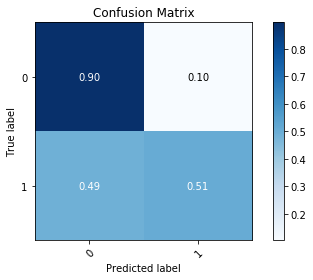

In [22]:
# confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

cm = plot_confusion_matrix(y_test, test_predictions, np.array([0,1]),
                          normalize=True,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues)
plt.show()

### sensitivity 

Sensitivity is the fraction of positive data points(data points with Outcome as 1 in our case) that are correctly identified by model to actual avilable positive data points in data.

$Sensitivity = \frac{TP}{TP + FN} $


In [23]:
# sensitivity for model
tn, fp, fn, tp = confusion_matrix(y_test, test_predictions).ravel()
sensitivity = tp/(tp + fn)
print(f'Sensitivity: {sensitivity}')

Sensitivity: 0.5081967213114754


### Specificity

Specificity is the fraction of negative data points(data points with Outcome as 0 in our case) that are correctly identified by model to actual avilable negative data points in data.

$ Sepcificity = \frac{TN}{TN + FP} $

In [24]:
# specificity for model
specificity = tn/(tn + fp)
print(f'Specificity: {specificity}')

Specificity: 0.8956521739130435


### Fallout

Fallout indicates the fraction of negative data points that are incorrectly identified by model out of all actual negative data points in data

$ Fallout = \frac{FP}{FP+TN} $

In [25]:
# fallout for model
fallout = fp/(fp+tn)
print(f'Fallout: {fallout}')

Fallout: 0.10434782608695652


### MissRate

MissRate indicates the fraction of positive data points that are incorrectly identified by model out of all actual positive data points in data

$ MissRate = \frac{FN}{FN+TP} $

In [27]:
# MissRate for model
missrate = fn/(fn+tp)
print(f'MissRate: {missrate}')

MissRate: 0.4918032786885246


### ROC curve

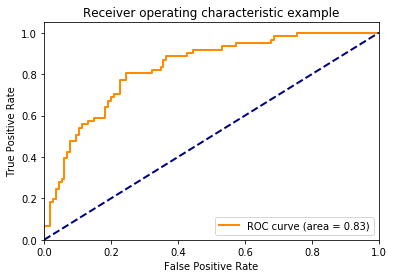

In [56]:
test_scores = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, test_scores)

# area under the curve
roc_auc = auc(fpr, tpr)

# plot roc curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

1.9687496711280876